# Questionnaire Spatial Strategies FRS


## Import packages 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
#import ptitprince as pt
from statsmodels.stats.anova import *

In [5]:
# Data set loading
df_file = "E:/HumanA/Data/Data_Tracy/Questionnaires/FRS.csv"
df = pd.read_csv(df_file, sep= ',')

df.describe()

,ID,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Alter
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,5209.423077,4.807692,3.730769,4.346154,4.346154,5.192308,2.346154,4.000000,4.269231,3.076923,...,4.423077,5.076923,5.038462,4.307692,4.846154,4.538462,2.461538,4.038462,4.115385,22.384615
std,2448.303709,0.938903,1.733383,1.495120,1.324909,1.200641,1.231010,1.322876,1.185165,1.521133,...,1.724484,1.293772,1.684773,1.257592,1.189699,1.392286,1.502818,1.455494,1.478565,2.801099
min,1031.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,19.000000
25%,3693.500000,4.250000,2.000000,3.250000,3.000000,5.000000,1.250000,3.000000,3.250000,2.000000,...,3.000000,4.250000,4.250000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,21.000000
50%,5175.000000,5.000000,3.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,6.000000,5.000000,5.000000,5.000000,2.000000,4.000000,4.000000,22.000000
75%,6912.250000,5.000000,5.000000,5.000000,5.000000,6.000000,3.000000,5.000000,5.000000,4.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,3.000000,5.000000,5.000000,23.000000
max,9627.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,31.000000


## „Globale Einschätzung der Orientierungsfähigkeit mit Richtungs- und Wegstrategie“

In [6]:
df["Global"] = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15",
"Item18"]].mean(axis=1)
df["Global"].describe()
Global = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15","Item18"]]
pg.cronbach_alpha(data=Global, ci=.99)

(0.838029123581581, array([0.68 , 0.934]))

## „Verwendung einer Überblicksstrategie“

In [7]:
df["Overview"] = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]].mean(axis=1)
Overview = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]]
pg.cronbach_alpha(data=Overview, ci=.99)

(0.8030110335261318, array([0.6 , 0.92]))

## „Kenntnis der Himmelsrichtungen“

In [8]:
df["Cardinal"] = df[["Item6", "Item17"]].mean(axis=1)
Cardinal = df[["Item6", "Item17"]]
pg.cronbach_alpha(data=Cardinal, ci=.99)


(0.7907320680305645, array([0.394, 0.928]))

In [9]:
df1 = df.iloc[:, [2,22,24,25,26]].copy()
FRSsubs= df1.dropna()
FRSsubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        26 non-null     int64  
 1   Alter     26 non-null     int64  
 2   Global    26 non-null     float64
 3   Overview  26 non-null     float64
 4   Cardinal  26 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [10]:
FRSsubsLong = pd.melt(FRSsubs, id_vars=['ID'], value_vars=["Global", "Overview", "Cardinal"], var_name='Subscale', value_name='Average')
FRSsubsLong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        78 non-null     int64  
 1   Subscale  78 non-null     object 
 2   Average   78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


## Export File to CSV

In [11]:
os.chdir('E:/HumanA/Data/Data_Tracy/Questionnaires/Adjusted')
FRSsubs.to_csv('FRSsubs.csv')

## Plotting

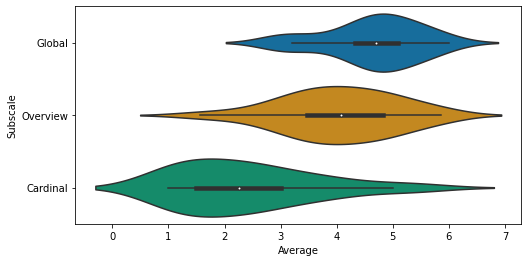

In [12]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.set_palette('colorblind')
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.violinplot(data= FRSsubsLong, x=dx, y=dy, scale="width")
plt.show()

<Figure size 864x576 with 0 Axes>

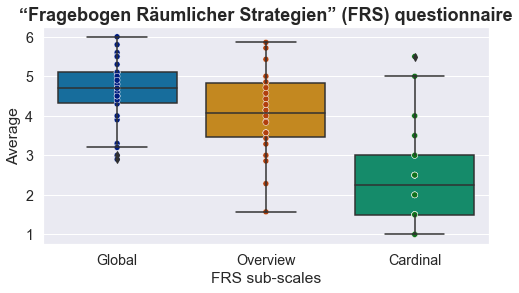

In [13]:
dy="Subscale"; dx="Average"; ort="H";  sigma = .2
sns.set_palette("colorblind")
sns.set_style("white")
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)
plt.tight_layout()
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.boxplot(data= FRSsubsLong, y=dx, x=dy, palette='colorblind').set( xlabel='FRS sub-scales')
sns.scatterplot(data= FRSsubsLong, y=dx, x=dy, hue=dy, palette='dark', legend=False)
plt.title('“Fragebogen Räumlicher Strategien” (FRS) questionnaire', weight='bold').set_fontsize('18')
plt.show()

NameError: name 'pt' is not defined

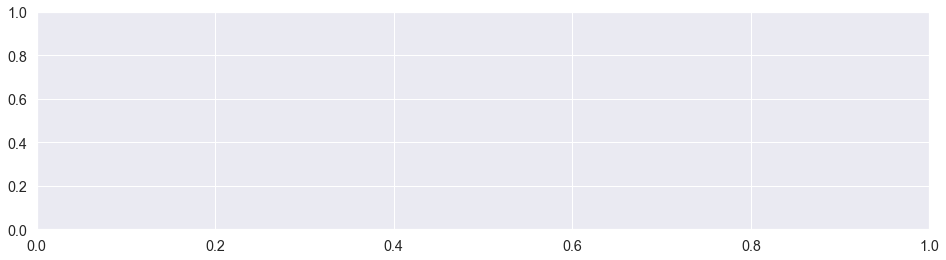

In [14]:

dy="Subscale"; dx="Average"; ort="h"; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(16, 4))

ax=pt.half_violinplot( x = dx, y = dy, data =
FRSsubsLong, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = FRSsubsLong, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = FRSsubsLong, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 